In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, shapiro
import statsmodels.api as sm
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [35]:
df = pd.read_csv('ANOVA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n                 540 non-null    int64  
 1   tau               540 non-null    float64
 2   J_id              540 non-null    int64  
 3   ARL1_CEWMA        540 non-null    float64
 4   ARL1_Shewhart     540 non-null    float64
 5   ARL1_dif          540 non-null    float64
 6   ARL_var_CEWMA     540 non-null    float64
 7   ARL_var_Shewhart  540 non-null    float64
 8   Var_CvsS          540 non-null    float64
 9   J_skew            540 non-null    int64  
 10  J_kurt            540 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 46.5 KB


In [36]:
N = df.n
TAU = df.tau
J = df.J_id
Skew = df.J_skew
Kurt = df.J_kurt
factor_groups = df.groupby(['n','tau'])

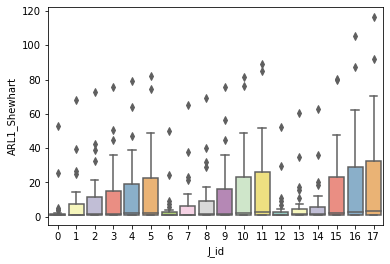

In [37]:
sns.boxplot(x="J_id", y="ARL1_Shewhart", data=df, palette="Set3")

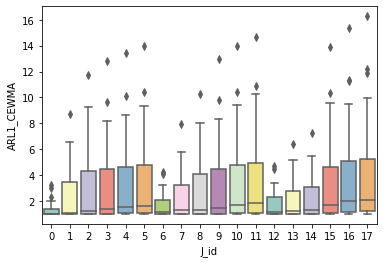

In [38]:
sns.boxplot(x="J_id", y="ARL1_CEWMA", data=df, palette="Set3")

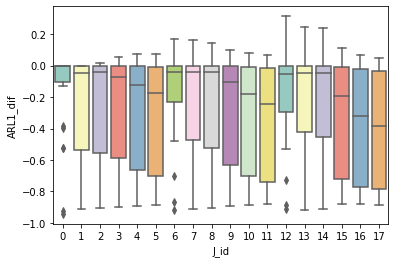

In [39]:
sns.boxplot(x="J_id", y="ARL1_dif", data=df, palette="Set3")

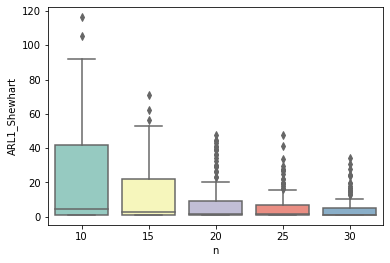

In [40]:
sns.boxplot(x="n", y="ARL1_Shewhart", data=df, palette="Set3")

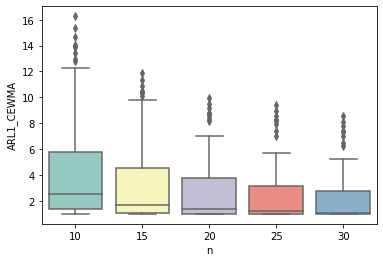

In [41]:
sns.boxplot(x="n", y="ARL1_CEWMA", data=df, palette="Set3")

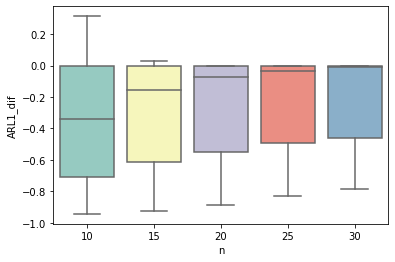

In [42]:
sns.boxplot(x="n", y="ARL1_dif", data=df, palette="Set3")

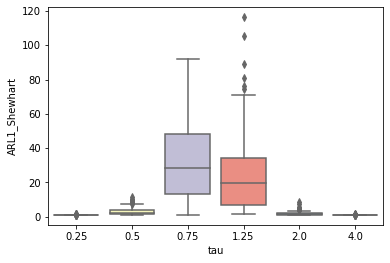

In [43]:
sns.boxplot(x="tau", y="ARL1_Shewhart", data=df, palette="Set3")

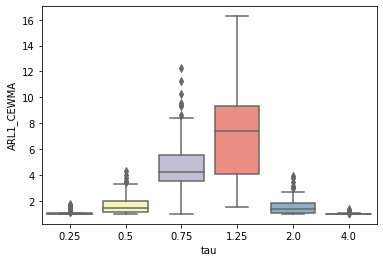

In [44]:
sns.boxplot(x="tau", y="ARL1_CEWMA", data=df, palette="Set3")

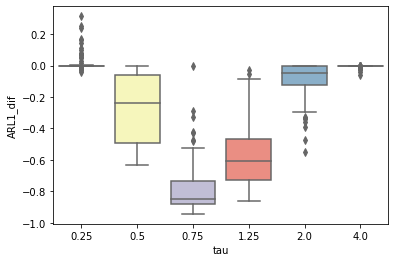

In [45]:
sns.boxplot(x="tau", y="ARL1_dif", data=df, palette="Set3")

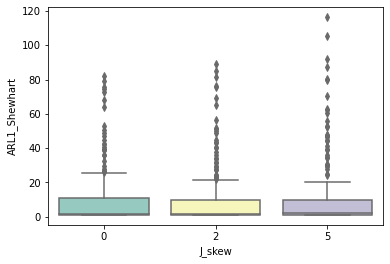

In [46]:
sns.boxplot(x="J_skew", y="ARL1_Shewhart", data=df, palette="Set3")

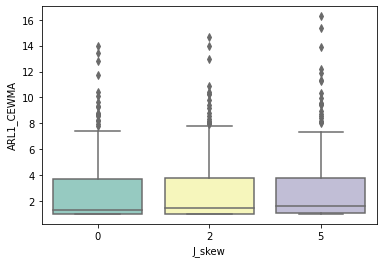

In [47]:
sns.boxplot(x="J_skew", y="ARL1_CEWMA", data=df, palette="Set3")

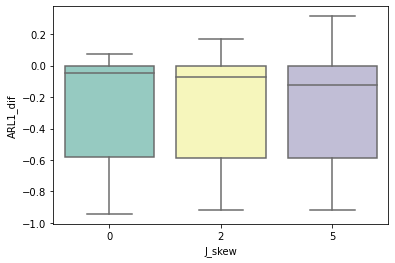

In [48]:
sns.boxplot(x="J_skew", y="ARL1_dif", data=df, palette="Set3")

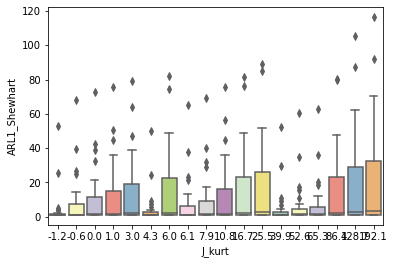

In [49]:
sns.boxplot(x="J_kurt", y="ARL1_Shewhart", data=df, palette="Set3")

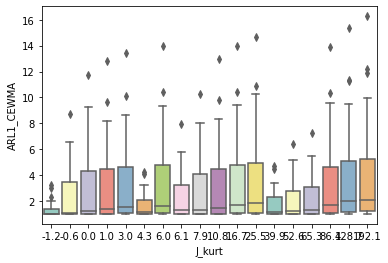

In [50]:
sns.boxplot(x="J_kurt", y="ARL1_CEWMA", data=df, palette="Set3")

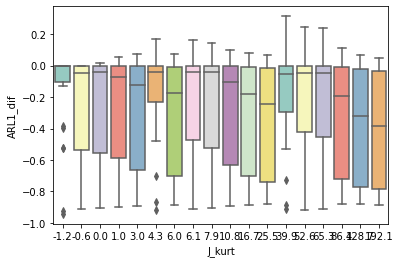

In [51]:
sns.boxplot(x="J_kurt", y="ARL1_dif", data=df, palette="Set3")

In [52]:
fvalue, pvalue = f_oneway(df['ARL1_CEWMA'], df['ARL1_Shewhart'])
print('F value:',fvalue)
print('P value:', pvalue)

F value: 93.67680941177215
P value: 2.6527529681339747e-21


In [53]:
model = ols("ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(model.summary())
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:               ARL1_dif   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     60.75
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          2.92e-192
Time:                        18:47:15   Log-Likelihood:                 798.49
No. Observations:                 540   AIC:                            -1197.
Df Residuals:                     340   BIC:                            -338.7
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [54]:
model.model.exog_names

['Intercept',
 'C(n, Sum)[S.10]',
 'C(n, Sum)[S.15]',
 'C(n, Sum)[S.20]',
 'C(n, Sum)[S.25]',
 'C(tau, Sum)[S.0.25]',
 'C(tau, Sum)[S.0.5]',
 'C(tau, Sum)[S.0.75]',
 'C(tau, Sum)[S.1.25]',
 'C(tau, Sum)[S.2.0]',
 'C(J_id, Sum)[S.0]',
 'C(J_id, Sum)[S.1]',
 'C(J_id, Sum)[S.2]',
 'C(J_id, Sum)[S.3]',
 'C(J_id, Sum)[S.4]',
 'C(J_id, Sum)[S.5]',
 'C(J_id, Sum)[S.6]',
 'C(J_id, Sum)[S.7]',
 'C(J_id, Sum)[S.8]',
 'C(J_id, Sum)[S.9]',
 'C(J_id, Sum)[S.10]',
 'C(J_id, Sum)[S.11]',
 'C(J_id, Sum)[S.12]',
 'C(J_id, Sum)[S.13]',
 'C(J_id, Sum)[S.14]',
 'C(J_id, Sum)[S.15]',
 'C(J_id, Sum)[S.16]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.20]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.25]:C(tau, Sum)[S.0.25]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.20]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.25]:C(tau, Sum)[S.0.5]',
 'C(n, Sum)[S.10]:C(tau, Sum)[S.0.75]',
 'C(n, Sum)[S.15]:C(tau, Sum)[S.0.75]',
 'C(n, Sum)

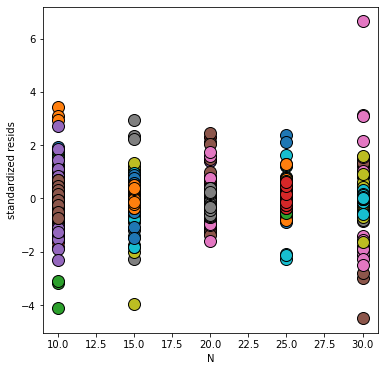

In [55]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(N[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('N');
plt.ylabel('standardized resids');

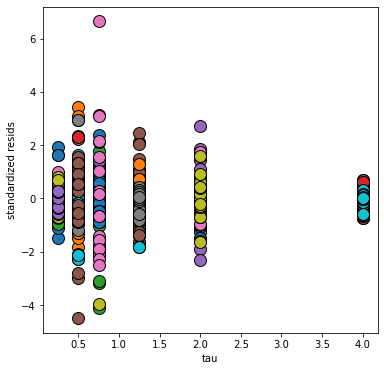

In [56]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(TAU[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('tau');
plt.ylabel('standardized resids');

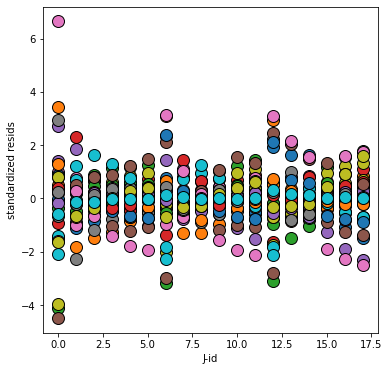

In [57]:
infl = model.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(J[idx], resid[idx], s=144, edgecolors='black')
    
plt.xlabel('J-id');
plt.ylabel('standardized resids');

In [58]:
# Remove non significant interaction n and J_id
model = ols("ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(J_id, Sum):C(tau,Sum)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(n, Sum)",2.100297,4.0,120.150117,1.216651e-67
"C(tau, Sum)",48.082711,5.0,2200.505127,1.605115e-292
"C(J_id, Sum)",3.074025,17.0,41.377274,9.491721e-78
"C(n, Sum):C(tau, Sum)",2.758351,20.0,31.558980,3.586455e-70
"C(J_id, Sum):C(tau, Sum)",2.248479,85.0,6.053037,3.532649e-36
Residual,1.783022,408.0,NaN,NaN


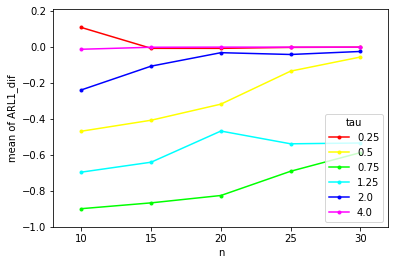

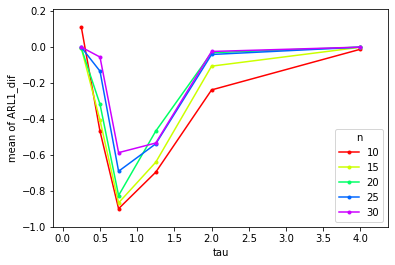

In [59]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['n'], trace=df['tau'], response=df['ARL1_dif'])
fig2 = interaction_plot(x=df['tau'], trace=df['n'], response=df['ARL1_dif'])
plt.show()

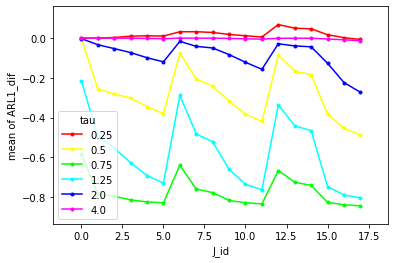

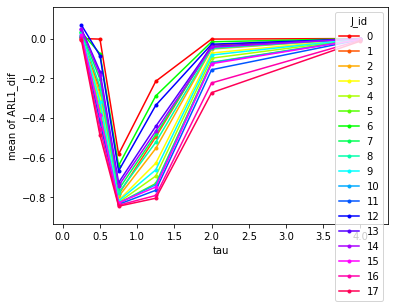

In [60]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['J_id'], trace=df['tau'], response=df['ARL1_dif'])
fig1 = interaction_plot(x=df['tau'], trace=df['J_id'], response=df['ARL1_dif'])
plt.show()

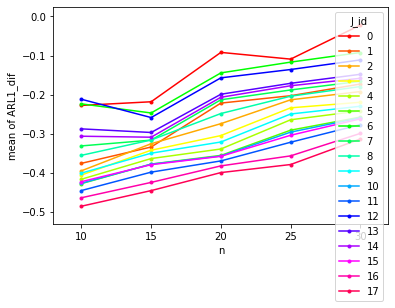

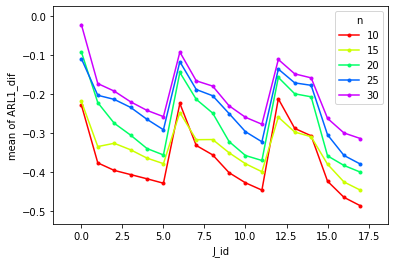

In [61]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig1 = interaction_plot(x=df['n'], trace=df['J_id'], response=df['ARL1_dif'])
fig2 = interaction_plot(x=df['J_id'], trace=df['n'], response=df['ARL1_dif'])
plt.show()

In [62]:
import statsmodels.stats.multicomp as mc

interaction_groups = "n_" + df.n.astype(str) + " & " + "tau_" + df.tau.astype(str)

comp = mc.MultiComparison(df["ARL1_dif"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
n_10 & tau_0.25,n_10 & tau_0.5,-0.5773,0.001,-0.7257,-0.429,True
n_10 & tau_0.25,n_10 & tau_0.75,-1.0086,0.001,-1.1569,-0.8602,True
n_10 & tau_0.25,n_10 & tau_1.25,-0.8052,0.001,-0.9536,-0.6568,True
n_10 & tau_0.25,n_10 & tau_2.0,-0.3475,0.001,-0.4958,-0.1991,True
n_10 & tau_0.25,n_10 & tau_4.0,-0.1212,0.3306,-0.2696,0.0271,False
n_10 & tau_0.25,n_15 & tau_0.25,-0.116,0.433,-0.2644,0.0323,False
n_10 & tau_0.25,n_15 & tau_0.5,-0.5163,0.001,-0.6646,-0.3679,True
n_10 & tau_0.25,n_15 & tau_0.75,-0.9762,0.001,-1.1246,-0.8278,True
n_10 & tau_0.25,n_15 & tau_1.25,-0.7498,0.001,-0.8982,-0.6015,True
n_10 & tau_0.25,n_15 & tau_2.0,-0.2152,0.001,-0.3635,-0.0668,True


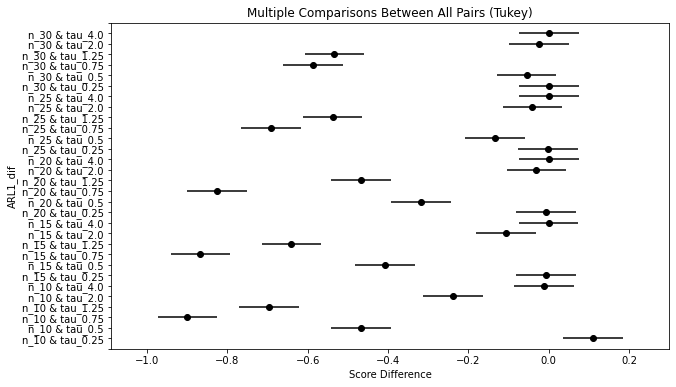

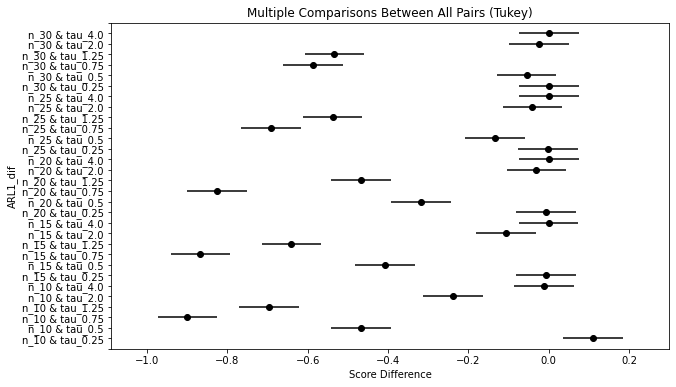

In [36]:
post_hoc_res.plot_simultaneous(ylabel= "ARL1_dif", xlabel= "Score Difference")

In [70]:
interaction_groups = "tau_" + df.tau.astype(str)

comp = mc.MultiComparison(df["ARL1_dif"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
tau_0.25,tau_0.5,-0.295,0.001,-0.3589,-0.2312,True
tau_0.25,tau_0.75,-0.7929,0.001,-0.8567,-0.7291,True
tau_0.25,tau_1.25,-0.5939,0.001,-0.6577,-0.5301,True
tau_0.25,tau_2.0,-0.1068,0.001,-0.1706,-0.043,True
tau_0.25,tau_4.0,-0.0214,0.9,-0.0852,0.0425,False
tau_0.5,tau_0.75,-0.4978,0.001,-0.5617,-0.434,True
tau_0.5,tau_1.25,-0.2989,0.001,-0.3627,-0.235,True
tau_0.5,tau_2.0,0.1882,0.001,0.1244,0.252,True
tau_0.5,tau_4.0,0.2737,0.001,0.2099,0.3375,True
tau_0.75,tau_1.25,0.199,0.001,0.1352,0.2628,True


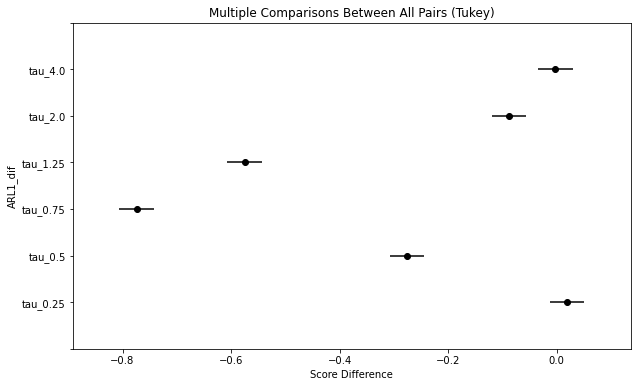

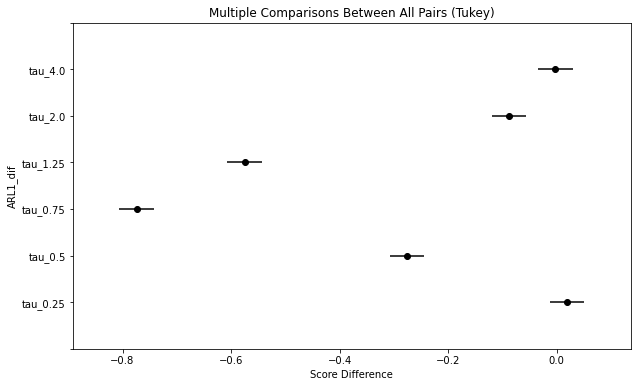

In [71]:
post_hoc_res.plot_simultaneous(ylabel= "ARL1_dif", xlabel= "Score Difference")

In [68]:
interaction_groups = "n_" + df.n.astype(str)

comp = mc.MultiComparison(df["ARL1_dif"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
n_10,n_15,0.0294,0.9,-0.0932,0.152,False
n_10,n_20,0.0926,0.236,-0.03,0.2152,False
n_10,n_25,0.1331,0.0256,0.0105,0.2557,True
n_10,n_30,0.1672,0.0019,0.0446,0.2898,True
n_15,n_20,0.0632,0.6047,-0.0594,0.1858,False
n_15,n_25,0.1037,0.1412,-0.0189,0.2263,False
n_15,n_30,0.1378,0.0186,0.0153,0.2604,True
n_20,n_25,0.0405,0.8917,-0.0821,0.1631,False
n_20,n_30,0.0746,0.4573,-0.048,0.1972,False
n_25,n_30,0.0341,0.9,-0.0885,0.1567,False


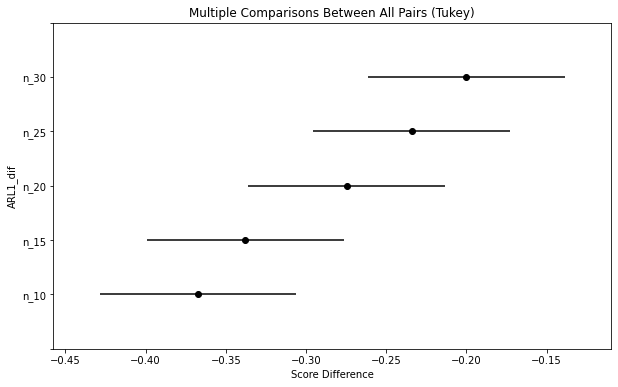

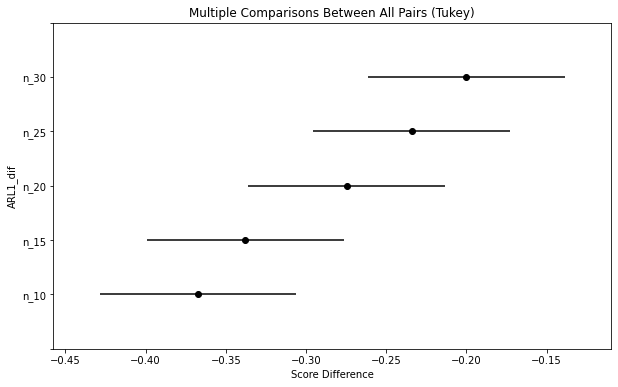

In [69]:
post_hoc_res.plot_simultaneous(ylabel= "ARL1_dif", xlabel= "Score Difference")

In [65]:
interaction_groups = "J.ID_" + df.J_id.astype(str)

comp = mc.MultiComparison(df["ARL1_dif"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
J.ID_0,J.ID_1,-0.1277,0.9,-0.4268,0.1714,False
J.ID_0,J.ID_10,-0.2097,0.5543,-0.5088,0.0895,False
J.ID_0,J.ID_11,-0.2287,0.401,-0.5278,0.0704,False
J.ID_0,J.ID_12,-0.0411,0.9,-0.3403,0.258,False
J.ID_0,J.ID_13,-0.0868,0.9,-0.3859,0.2124,False
J.ID_0,J.ID_14,-0.0978,0.9,-0.3969,0.2013,False
J.ID_0,J.ID_15,-0.2114,0.5409,-0.5105,0.0877,False
J.ID_0,J.ID_16,-0.2516,0.2296,-0.5507,0.0475,False
J.ID_0,J.ID_17,-0.2708,0.1307,-0.57,0.0283,False
J.ID_0,J.ID_2,-0.1463,0.9,-0.4454,0.1528,False


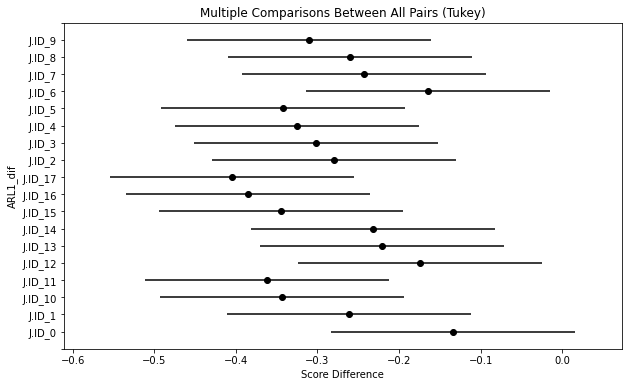

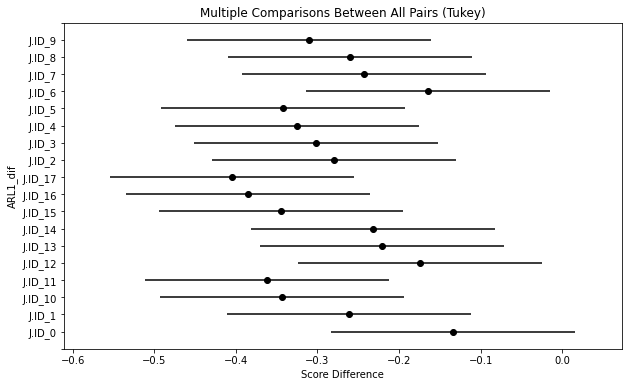

In [67]:
post_hoc_res.plot_simultaneous(ylabel= "ARL1_dif", xlabel= "Score Difference")

In [55]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='ARL1_dif', anova_model='ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
"C(n, Sum)",4.0,2.100297,0.525074,108.679601,1.517049e-59
"C(tau, Sum)",5.0,48.082711,9.616542,1990.426848,2.694918e-249
"C(J_id, Sum)",17.0,3.074025,0.180825,37.427060,2.525916e-67
"C(n, Sum):C(tau, Sum)",20.0,2.758351,0.137918,28.546101,1.133455e-60
"C(n, Sum):C(J_id, Sum)",68.0,0.140347,0.002064,0.427191,9.999757e-01
"C(J_id, Sum):C(tau, Sum)",85.0,2.248479,0.026453,5.475164,7.014378e-30
Residual,340.0,1.642675,0.004831,NaN,NaN


In [57]:
res = stat()
res.tukey_hsd(df=df, res_var='ARL1_dif', xfac_var='n', anova_model='ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,10,15,0.029370,0.003429,0.055311,4.391162,0.017495
1,10,20,0.092583,0.066642,0.118524,13.842316,0.001000
2,10,25,0.133096,0.107155,0.159037,19.899469,0.001000
3,10,30,0.167209,0.141267,0.193150,24.999649,0.001000
4,15,20,0.063213,0.037272,0.089154,9.451154,0.001000
5,15,25,0.103726,0.077785,0.129667,15.508307,0.001000
6,15,30,0.137839,0.111897,0.163780,20.608487,0.001000
7,20,25,0.040513,0.014572,0.066454,6.057153,0.001000
8,20,30,0.074625,0.048684,0.100566,11.157333,0.001000
9,25,30,0.034112,0.008171,0.060053,5.100180,0.003268


In [58]:
res = stat()
res.tukey_hsd(df=df, res_var='ARL1_dif', xfac_var='tau', anova_model='ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.25,0.50,0.295034,0.265337,0.324731,40.267698,0.001000
1,0.25,0.75,0.792871,0.763174,0.822568,108.215021,0.001000
2,0.25,1.25,0.593888,0.564191,0.623584,81.056737,0.001000
3,0.25,2.00,0.106829,0.077132,0.136526,14.580601,0.001000
4,0.25,4.00,0.021365,-0.008332,0.051062,2.916002,0.309954
5,0.50,0.75,0.497837,0.468140,0.527534,67.947324,0.001000
6,0.50,1.25,0.298854,0.269157,0.328551,40.789040,0.001000
7,0.50,2.00,0.188205,0.158508,0.217901,25.687097,0.001000
8,0.50,4.00,0.273669,0.243972,0.303366,37.351696,0.001000
9,0.75,1.25,0.198984,0.169287,0.228681,27.158284,0.001000


In [59]:
res = stat()
res.tukey_hsd(df=df, res_var='ARL1_dif', xfac_var='J_id', anova_model='ARL1_dif ~ C(n, Sum) + C(tau, Sum) + C(J_id, Sum) + C(n, Sum):C(tau,Sum) + C(n, Sum):C(J_id,Sum) + C(J_id, Sum):C(tau,Sum)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,0.127690,0.064586,0.190794,10.061927,0.001000
1,0,2,0.146308,0.083204,0.209412,11.529045,0.001000
2,0,3,0.167490,0.104386,0.230594,13.198153,0.001000
3,0,4,0.191270,0.128166,0.254374,15.072008,0.001000
4,0,5,0.208146,0.145042,0.271250,16.401857,0.001000
...,...,...,...,...,...,...,...
148,14,16,0.153838,0.090734,0.216942,12.122406,0.001000
149,14,17,0.173069,0.109965,0.236173,13.637802,0.001000
150,15,16,0.040202,-0.022902,0.103306,3.167930,0.695344
151,15,17,0.059433,-0.003671,0.122537,4.683326,0.091698


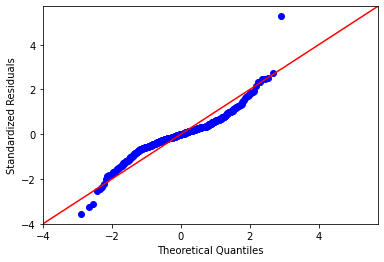

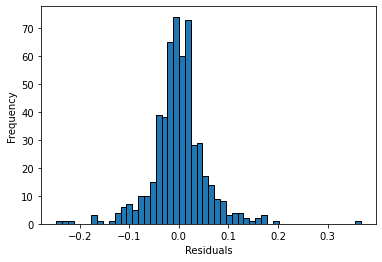

In [60]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [64]:
w, pvalue = shapiro(model.resid)
print(w, pvalue)

0.9271945357322693 1.608575600296053e-15


In [66]:
# Levene’s test can be used to check the Homogeneity of variances 
# when the data is not drawn from normal distribution.
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='ARL1_dif', xfac_var='n')
res.levene_summary

,Parameter,Value
0,Test statistics (W),5.9723
1,Degrees of freedom (Df),4.0000
2,p value,0.0001


In [67]:
res = stat()
res.levene(df=df, res_var='ARL1_dif', xfac_var='tau')
res.levene_summary

,Parameter,Value
0,Test statistics (W),54.6644
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


In [68]:
res = stat()
res.levene(df=df, res_var='ARL1_dif', xfac_var='J_id')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.7188
1,Degrees of freedom (Df),17.0000
2,p value,0.0361


In [ ]:
'''The ANOVA model is remarkably robust to the violation of normality assumption, 
which means that it will have a non-significant effect on Type I error rate and p values 
will remain reliable as long as there are no outliers'''
